### What is a Multi-Armed Bandit Problem?

The multi-armed bandit problem is a classic reinforcement learning problem where an agent must choose between multiple options (called "arms") to maximize its cumulative reward over time. Each arm provides a random reward from a distribution specific to that arm, and these distributions are initially unknown to the agent.

The challenge lies in the **explore-exploit dilemma**: should the agent explore less-known arms in the hope of finding a better one, or exploit the arm that currently appears to be the best?

Here, we'll implement a simple **Epsilon-Greedy** strategy, which balances exploration and exploitation:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Bandit class
class Bandit:
    def __init__(self, probabilities):
        self.probabilities = probabilities # True probabilities of success for each arm
        self.num_arms = len(probabilities)

    def pull(self, arm_index):
        # Simulate pulling an arm and getting a reward (0 or 1)
        if 0 <= arm_index < self.num_arms:
            return 1 if np.random.rand() < self.probabilities[arm_index] else 0
        else:
            raise ValueError("Invalid arm index")

    def __str__(self):
        return f"Bandit with {self.num_arms} arms and probabilities: {self.probabilities}"

print("Bandit class defined.")

Bandit class defined.


In [ ]:
# Define the Epsilon-Greedy Agent
class EpsilonGreedyAgent:
    def __init__(self, num_arms, epsilon):
        self.num_arms = num_arms
        self.epsilon = epsilon  # Probability of exploration
        self.q_values = np.zeros(num_arms) # Estimated values (average reward) for each arm
        self.action_counts = np.zeros(num_arms) # Number of times each arm has been pulled

    def choose_action(self):
        if np.random.rand() < self.epsilon: # Explore
            return np.random.randint(self.num_arms)
        else: # Exploit
            return np.argmax(self.q_values)

    def update(self, chosen_arm, reward):
        self.action_counts[chosen_arm] += 1
        # Update Q-value using incremental average formula
        self.q_values[chosen_arm] += (reward - self.q_values[chosen_arm]) / self.action_counts[chosen_arm]

    def __str__(self):
        return f"Epsilon-Greedy Agent (epsilon={self.epsilon})\nQ-Values: {self.q_values}\nAction Counts: {self.action_counts}"

print("EpsilonGreedyAgent class defined.")

EpsilonGreedyAgent class defined.


### Simulation

Now, let's set up a simulation. We'll define a bandit with three arms, each having a different true probability of giving a reward. Then, an Epsilon-Greedy agent will play the bandit over many rounds.

In [ ]:
# --- Simulation Parameters ---
TRUE_PROBABILITIES = [0.2, 0.7, 0.4] # True success probabilities for each arm
NUM_ARMS = len(TRUE_PROBABILITIES)
EPSILON = 0.1 # 10% chance to explore, 90% chance to exploit
NUM_STEPS = 1000 # Number of times the agent pulls an arm

# --- Setup ---
bandit = Bandit(TRUE_PROBABILITIES)
agent = EpsilonGreedyAgent(NUM_ARMS, EPSILON)

rewards = []
chosen_arms = []

# --- Run Simulation ---
for step in range(NUM_STEPS):
    arm = agent.choose_action()
    reward = bandit.pull(arm)
    agent.update(arm, reward)

    rewards.append(reward)
    chosen_arms.append(arm)

print(f"Simulation completed after {NUM_STEPS} steps.")
print("\nFinal Agent State:")
display(agent)
print("\nTrue Probabilities:", bandit.probabilities)

Simulation completed after 1000 steps.

Final Agent State:



True Probabilities: [0.2, 0.7, 0.4]


### Visualize Results

Let's visualize the agent's performance:
1.  **Cumulative Reward**: How the total reward increases over time.
2.  **Estimated Q-Values**: How the agent's estimated probabilities for each arm converge towards the true probabilities.
3.  **Action Counts**: How many times each arm was pulled.

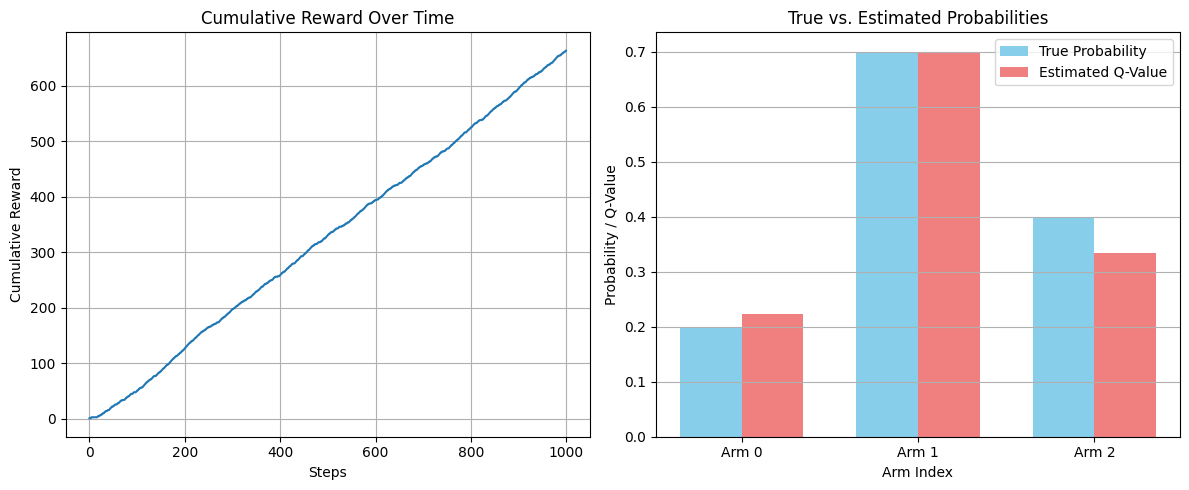


Number of times each arm was pulled:
Arm 0: 45 times
Arm 1: 919 times
Arm 2: 36 times


In [ ]:
import matplotlib.pyplot as plt

# 1. Cumulative Reward Plot
plt.figure(figsize=(12, 5), facecolor='white') # Set figure background to white
plt.subplot(1, 2, 1)
plt.gca().set_facecolor('white') # Set axes background to white
plt.plot(np.cumsum(rewards))
plt.title('Cumulative Reward Over Time')
plt.xlabel('Steps')
plt.ylabel('Cumulative Reward')
plt.grid(True)

# 2. Q-Value Convergence Plot
# For simplicity, let's just plot the final Q-values vs true probabilities.

plt.subplot(1, 2, 2)
x = np.arange(NUM_ARMS)
width = 0.35

plt.bar(x - width/2, bandit.probabilities, width, label='True Probability', color='skyblue')
plt.bar(x + width/2, agent.q_values, width, label='Estimated Q-Value', color='lightcoral')

plt.xlabel('Arm Index')
plt.ylabel('Probability / Q-Value')
plt.title('True vs. Estimated Probabilities')
plt.xticks(x, [f'Arm {i}' for i in range(NUM_ARMS)])
plt.legend()
plt.grid(axis='y')

plt.tight_layout()
plt.show()

# 3. Action Counts
print("\nNumber of times each arm was pulled:")
for i, count in enumerate(agent.action_counts):
    print(f"Arm {i}: {int(count)} times")

You can see how closely these values align with the True Probabilities which were [0.2, 0.7, 0.4]. The Epsilon-Greedy agent successfully learned good estimates of the true reward probabilities for each arm.

The agent pulled Arm 1 significantly more often because its estimated Q-value (and true probability) was the highest. Arms 0 and 2 were pulled less frequently, primarily during the 'exploration' phase or when their estimated values were close enough to warrant further investigation. This demonstrates the 'exploit' part of the Epsilon-Greedy strategy, where the agent favors the arm it believes to be the best, while still doing some 'exploration' to ensure its beliefs are accurate.